### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/univariate">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/univariate.git'

## Example

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd, numpy as np, sys
from scipy import stats
import matplotlib.pyplot as plt

sys.path.append('/content/univariate')
from Univariate import *

**<font size=5 color='blue'> UnivariateOutliers </font>**

---

`UnivariateOutliers` determines univariate outliers within one variable at a time. Any identified outlier, is capped to the lower/upper value.

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [4]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names

Randomly replace numerical value with `np.nan`.

In [5]:
np.random.seed(0)
NaN = np.random.random(X.shape)<0.1
X = pd.DataFrame(np.where(NaN, np.nan, X), columns=cols).iloc[:,:5]

Add non-numeric and all-nan fields

In [6]:
X['only_str'], X['all_nan'] = 'only_str', np.nan

Univariate outlier detection methods
- "**pct**"   : Percentile
- "**sigma**" : Z-score
- "**iqr**"   : Interquartile range
- "**grubb**" : Grubbs' test (Grubbs 1969 and Stefansky 1972)
- "**gesd**"  : Generalized Extreme Studentized Deviate
- "**mad**"   : Median Absolute Deviation
- "**mae**"   : Mean Absolute Error

In [ ]:
model = UnivariateOutliers().fit(X)

Excluded variables

In [8]:
model.exclude

{'non_numeric': ['only_str'], 'min_numeric': ['all_nan']}

In [9]:
model.info

,variable,lower,upper,n_lower,n_upper,n_outlier,n_notnan,p_outlier
0,mean radius,5.575586,24.727001,0,5,5,510,0.009804
1,mean area,-90.415776,1669.944390,0,12,12,506,0.023715
2,mean smoothness,0.054784,0.140480,1,3,4,498,0.008032
3,mean texture,8.188421,32.457089,0,3,3,513,0.005848
4,mean perimeter,35.200213,161.368201,0,5,5,505,0.009901


In [10]:
model.capped_X.head(5)

,mean radius,mean area,mean smoothness,mean texture,mean perimeter
0,17.99,1001.0,0.11840,10.38,122.80
1,20.57,1326.0,NaN,17.77,132.90
2,19.69,1203.0,0.10960,21.25,130.00
3,11.42,386.1,0.14048,20.38,77.58
4,20.29,1297.0,0.10030,14.34,135.10


**<font size=5 color='blue'> chi2_test </font>**

---

A chi-square goodness of fit test determines whether sample data fits a particular population.

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [11]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

$H_{0}$ : data follows a normal distribution.

$H_{A}$ : data does not follow a normal distribution.

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [12]:
chi2_test(x, dist="norm")

Chi2_Test(cv=0.4773224553586323, df=9, pvalue=0.9999750744566653, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

If shape-related parameters are known e.g. $\mu$ or $\sigma$ or true population, we can freeze them for the instance of the distribution.

In [13]:
chi2_test(x, dist=stats.norm(loc=2, scale=2))

Chi2_Test(cv=0.5705377388241217, df=9, pvalue=0.9999464408294994, dist='norm', params={'args': (), 'kwds': {'loc': 2, 'scale': 2}})

If $\alpha$ is 5% (0.05), we can not reject the null hypothesis (0.99 > 0.05). Or we can determine the critical value as follows:

In [14]:
print('Degrees of freedom = {:,.0f}'.format(9))
print('Critical Value = {:,.4f}'.format(stats.chi2.ppf(0.95, 9)))

Degrees of freedom = 9
Critical Value = 16.9190


We cannot reject the null hypotheis since $\chi^{2}$ is 0.477, which is less than $\chi^{2}_{\alpha=0.05, df=7}$ = 16.919

**<font size=5 color='blue'> qq_plot </font>**

---

Standard quantile-quantile (Q-Q) plot (Wilk and Gnanadesikan, 1968) is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other [wikipedia](https://en.wikipedia.org/wiki/Q–Q_plot)

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [15]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

See whether `x` follows normal or uniform distribution.

In [16]:
qq_plot(x, dist="norm")

QQ_plot(r=0.9998759256965546, cv=0.6020687774273007, rmse=0.06358873382864735, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

In [17]:
qq_plot(x, dist="uniform")   

QQ_plot(r=0.9717582798499491, cv=0.6020687774273007, rmse=1.239596599563976, dist='uniform', params=(-3.5451855128533003, 10.93763361798046))

In this case, "**norm**" returns higher value of `r` along with smaller value of `mse`, thus we could say that a random variable `x`, has a distribution similar to a normal random distribution, $N(\mu=2,\sigma=2)$. However, visualizing a Q-Q plot is highly recommended as indicators can sometimes be inadequate to conclude "**goodness of fit**" of both distributions.

**<font size=5 color='blue'> MatchDist </font>**

---

Matching distribution with data by using following methods:
- Chi-Square Test
- Kolmogorov-Smirnov Test
- Q-Q plot

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [18]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names
X = pd.DataFrame(X, columns=cols)

In [ ]:
model = MatchDist().fit(X)

Summary of results

In [20]:
model.info.sample(5)

,variable,chi2_cv,chi2_pvalue,chi2_dist,ks_statistic,ks_pvalue,ks_dist,qq_r,qq_rmse,qq_dist
13,mean fractal dimension,1.618867,0.996165,lognorm,0.023240,0.918368,lognorm,0.999673,0.000291,lognorm
23,symmetry error,3.896079,0.918118,lognorm,0.056012,0.054169,lognorm,0.978874,0.002276,beta
11,worst perimeter,5.473162,0.791267,gamma,0.059028,0.036411,gamma,0.997618,2.848099,gamma
21,worst compactness,2.054648,0.990574,gamma,0.027717,0.774546,lognorm,0.998799,0.010572,beta
17,worst smoothness,1.074336,0.999246,tukeylambda,0.023592,0.909428,tukeylambda,0.999361,0.001399,gamma


To visualize the distribution, use `plotting` function.

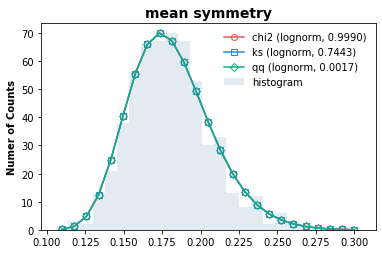

In [30]:
var = np.random.choice(cols)
model.plotting(var)

**<font size=5 color='blue'> Descriptive </font>**

---

Descriptive statistics. 

We use the breast cancer wisconsin dataset (`load_breast_cancer`) from the previous example.

In [31]:
model = Descriptive().fit(X)

Summary of results
- **Descriptive.num_info** (numerical)
- **Descriptive.str_info** (non-numerical)

In [32]:
model.num_info.iloc[:,:2]

variable,area error,compactness error
unique,528.000000,541.000000
missing,0.000000,0.000000
mean,40.337079,0.025478
std,45.451013,0.017892
fisher skew,5.432816,1.897202
galton skew,0.511339,0.239029
kurtosis,48.767196,5.050966
min,6.802000,0.002252
25%,17.850000,0.013080
50%,24.530000,0.020450


To visualize the distribution, use `plotting` function powered by `DescStatsPlot`.

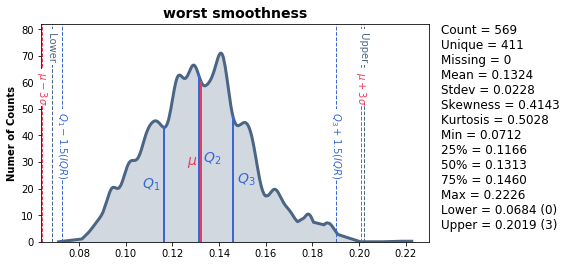

In [33]:
model.plotting("worst smoothness")
plt.show()

Alternatively, we can use `DescStatsPlot` to plot the distribution.

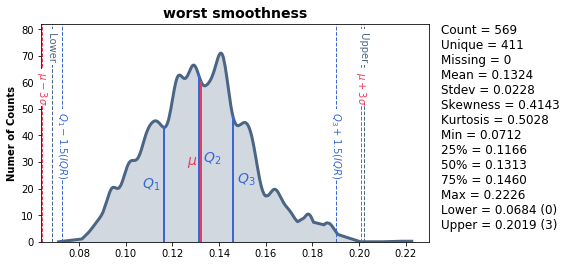

In [34]:
dStats = DescStatsPlot(X, model.num_info_)
dStats.plotting("worst smoothness")
plt.tight_layout(); plt.show()

**<font size=5 color='blue'> Compare2samp </font>**

---

Determine goodness of fit between two sets of data by using following methods:

- Chi-Square Test
- Kolmogorov-Smirnov Test (**scipy.stats.ks_2samp**)

**Note**: This function runs on scikit-learn 0.24.2

In [35]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
random_X = X.sample(100).copy()

In [38]:
model = Compare2samp(frac=0.01, max_category=1000).fit(X, random_X)

Summary of results

In [39]:
model.info.head()

,chi2_cv,chi2_df,chi2_pvalue,chi2_bins,ks_stat,ks_pvalue,dtype
variable,,,,,,,
pclass,0.190781,2,0.909018,3,0.021635,1.000000,int32
age,8.861421,7,0.262759,8,0.082108,0.529354,float32
sibsp,4.487915,4,0.343983,5,0.019328,1.000000,int32
parch,0.287042,2,0.866303,3,0.014660,1.000000,int32
fare,2.080840,4,0.720893,5,0.049664,0.966567,float32


To visualize Chi-Square Goodness of Fit, use `plotting`.

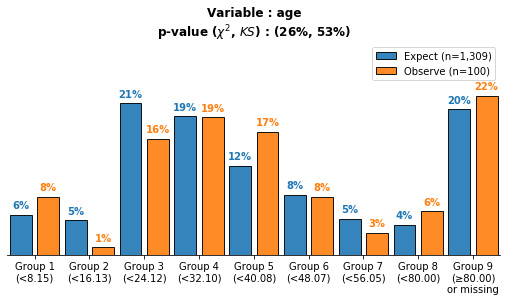

In [44]:
var = np.random.choice(list(model.result.keys()))
ax = model.plotting(var, max_display=1)